In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv(r'C:\Users\OsamaAyman\Desktop\AI/ML_project\task 2\Wuzzuf_Jobs.csv')
# fatorize
#dataset['Fact']=pd.factorize(dataset['YearsExp'])[0]
dataset

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ..."
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin..."
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ..."
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an..."
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain"
...,...,...,...,...,...,...,...,...
4375,Corporate Sales Executive - Hotel Supplies,Term,New Cairo,Full Time,Experienced,3-7 Yrs of Exp,Cairo,"Corporate Sales, Sales Target, English, Comput..."
4376,Logistics Operations & Warehouse Supervisor,DHL Express Egypt,Abu Rawash,Full Time,Manager,6+ Yrs of Exp,Giza,"Warehousing, Supply Chain Management, Customs ..."
4377,English Teacher ( Second Language ) / Lower...,Modern American School of Egypt 2000,New Cairo,Full Time,Experienced,3-7 Yrs of Exp,Cairo,"English Teacher, Lower Primar, Education, Teac..."
4378,Project Manager - Cairo,KnowledgeNet,Nasr City,Full Time,Manager,5+ Yrs of Exp,Cairo,"Implementation, Project Management, Informatio..."


In [3]:
# factorize YearsExp and Company inplace 

dataset['YearsExp']=pd.factorize(dataset['YearsExp'])[0]
dataset['Company']=pd.factorize(dataset['Company'])[0]

dataset

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
0,Customer Service Agent,0,New Cairo,Full Time,Entry Level,0,Cairo,"Call Center, Customer Support, Customer Care, ..."
1,Marketing Manager,1,Dokki,Full Time,Manager,1,Giza,"Market Research, Social Media, Online Marketin..."
2,Medical Representative Heliopolis,2,Cairo,Full Time,Entry Level,2,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ..."
3,Order Handling Specialist,0,New Cairo,Full Time,Experienced,3,Cairo,"Supply Officer, Supply Planner, Procurement an..."
4,Storekeeper,3,Cairo,Full Time,Experienced,4,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain"
...,...,...,...,...,...,...,...,...
4375,Corporate Sales Executive - Hotel Supplies,1532,New Cairo,Full Time,Experienced,49,Cairo,"Corporate Sales, Sales Target, English, Comput..."
4376,Logistics Operations & Warehouse Supervisor,584,Abu Rawash,Full Time,Manager,44,Giza,"Warehousing, Supply Chain Management, Customs ..."
4377,English Teacher ( Second Language ) / Lower...,1533,New Cairo,Full Time,Experienced,49,Cairo,"English Teacher, Lower Primar, Education, Teac..."
4378,Project Manager - Cairo,133,Nasr City,Full Time,Manager,13,Cairo,"Implementation, Project Management, Informatio..."


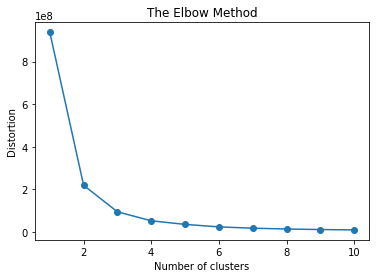

In [4]:
# draw Elbow Method between YearsExp and Company

from sklearn.cluster import KMeans
x = dataset.iloc[:, [5, 1]].values

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show();

[[   0    0]
 [   1    1]
 [   2    2]
 ...
 [  49 1533]
 [  13  133]
 [  49 1533]]


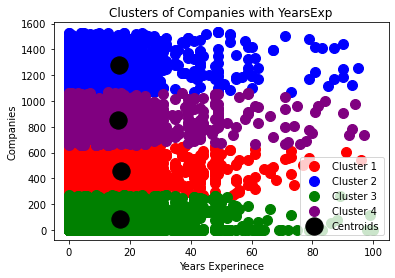

In [5]:
# the number of clusters is 4 from figure Elbow Method between YearsExp and Company
# so the k-meanning is :-

from sklearn.cluster import KMeans

X = dataset.iloc[:, [5, 1]].values
print(X)

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans == 0
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of Companies with YearsExp')
plt.xlabel('Years Experinece')
plt.ylabel('Companies')
plt.legend()
plt.show()

In [6]:
# Factroize Title and Company inplace  
dataset = pd.read_csv(r'C:\Users\OsamaAyman\Desktop\AI/ML_project\task 2\Wuzzuf_Jobs.csv')
dataset['Title']=pd.factorize(dataset['Title'])[0]
dataset['Company']=pd.factorize(dataset['Company'])[0]

dataset

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
0,0,0,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ..."
1,1,1,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin..."
2,2,2,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ..."
3,3,0,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an..."
4,4,3,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain"
...,...,...,...,...,...,...,...,...
4375,2961,1532,New Cairo,Full Time,Experienced,3-7 Yrs of Exp,Cairo,"Corporate Sales, Sales Target, English, Comput..."
4376,2962,584,Abu Rawash,Full Time,Manager,6+ Yrs of Exp,Giza,"Warehousing, Supply Chain Management, Customs ..."
4377,2963,1533,New Cairo,Full Time,Experienced,3-7 Yrs of Exp,Cairo,"English Teacher, Lower Primar, Education, Teac..."
4378,2048,133,Nasr City,Full Time,Manager,5+ Yrs of Exp,Cairo,"Implementation, Project Management, Informatio..."


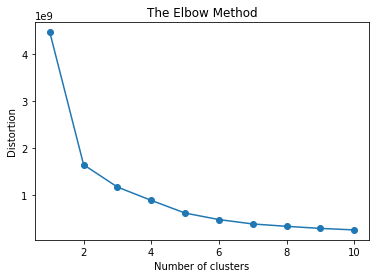

In [7]:
# draw Elbow Method between jobs Title and Company

from sklearn.cluster import KMeans
x = dataset.iloc[:, [0, 1]].values

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show();

[[   0    0]
 [   1    1]
 [   2    2]
 ...
 [2963 1533]
 [2048  133]
 [2964 1533]]


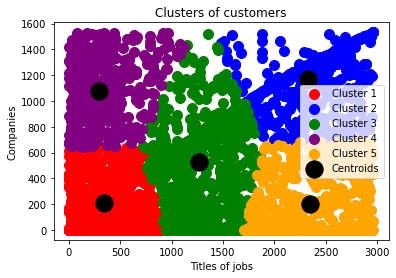

In [8]:
# the number of clusters is 5 from figure Elbow Method between job Titles and Company
# so the k-meanning is :-
from sklearn.cluster import KMeans
X = dataset.iloc[:, [0, 1]].values
print(X)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans == 0
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Titles of jobs')
plt.ylabel('Companies')
plt.legend()
plt.show()